In [35]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [36]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Churn_Modelling.csv')  # Load the CSV data into a DataFrame

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
# Remove specific columns from the DataFrame
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)  # Drop unnecessary columns

In [39]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# Count the frequency of each distinct value in the 'Geography' column
df['Geography'].value_counts()  # Count occurrences of each geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [41]:

# Count the frequency of each distinct value in the 'Gender' column
df['Gender'].value_counts()  # Count occurrences of each gender


Male      5457
Female    4543
Name: Gender, dtype: int64

In [42]:

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)  # Convert categorical columns to dummy variables


In [43]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [44]:
# Separate features (X) from the target variable (y)
X = df.drop(columns=['Exited'])  # Select all columns except 'Exited' as features
y = df['Exited'].values  # Extract the 'Exited' column as the target variable

# Import the train_test_split function for data splitting
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Split data into 80% training, 20% testing


In [45]:
# Import the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_trf = scaler.fit_transform(X_train)  # Scale training features

# Transform the testing data using the same scaler
X_test_trf = scaler.transform(X_test)  # Scale testing features using fitted scaler


In [46]:
# Import TensorFlow and its modules for neural network building
import tensorflow as tf  # Import TensorFlow
from tensorflow import keras  # Import the Keras API for building models
from tensorflow.keras import Sequential  # Import the Sequential model class
from tensorflow.keras.layers import Dense  # Import the Dense layer class for fully connected layers


In [47]:
# Create a sequential neural network model
model = Sequential()  # Create a sequential model

# Add the first hidden layer with 11 neurons, sigmoid activation, and specify input shape
model.add(Dense(11, activation='sigmoid', input_dim=11))  # First hidden layer with 11 neurons and sigmoid activation

# Add the second hidden layer with 11 neurons and sigmoid activation
model.add(Dense(11, activation='sigmoid'))  # Second hidden layer with 11 neurons and sigmoid activation

# Add the output layer with 1 neuron (for binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation


In [48]:
# Print a summary of the model architecture
model.summary()  # Display the model's structure and parameter count


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model for training


In [50]:

# Train the model on the training data
history = model.fit(X_train_trf,  # Use scaled training features
                     y_train,
                     batch_size=50,  # Update weights based on 50 samples per batch
                     epochs=100,  # Train for 100 epochs (iterations over the entire dataset)
                     verbose=1,  # Display progress bar during training
                     validation_split=0.2)  # Use 20% of training data for validation


Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5114 - accuracy: 0.7958 - val_loss: 0.4981 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7958 - val_loss: 0.4862 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7958 - val_loss: 0.4699 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.7958 - val_loss: 0.4539 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7959 - val_loss: 0.4427 - val_accuracy: 0.7975
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7995 - val_loss: 0.4368 - val_accuracy: 0.8000
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8056 - val_loss: 0.4336 - val_accuracy: 0.8100

In [51]:
# Generate predictions for the testing data
y_pred = model.predict(X_test_trf)  # Predict class probabilities for testing features

63/63 [==============================] - 0s 1ms/step


In [52]:
y_pred

array([[0.30122334],
       [0.3338724 ],
       [0.11724666],
       ...,
       [0.10411552],
       [0.15057437],
       [0.3181124 ]], dtype=float32)

In [53]:

# Convert predicted probabilities to class labels (0 or 1)
y_pred = y_pred.argmax(axis=-1)  # Get the index of the highest probability, representing the predicted class


In [54]:
# Import the accuracy_score function for performance evaluation
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy of the model's predictions on the testing data
accuracy = accuracy_score(y_test, y_pred)  # Compare true labels with predicted labels
print("Accuracy:", accuracy)  # Display the accuracy score


Accuracy: 0.7975


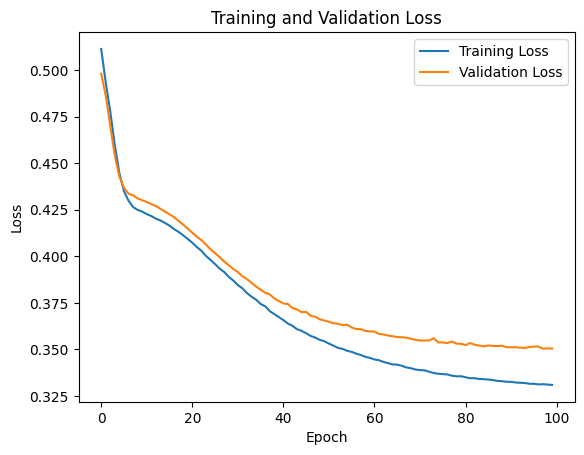

In [55]:

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.title('Training and Validation Loss')  # Add a title to the plot
plt.legend()  # Display the legend to distinguish lines
plt.show()  # Show the plot


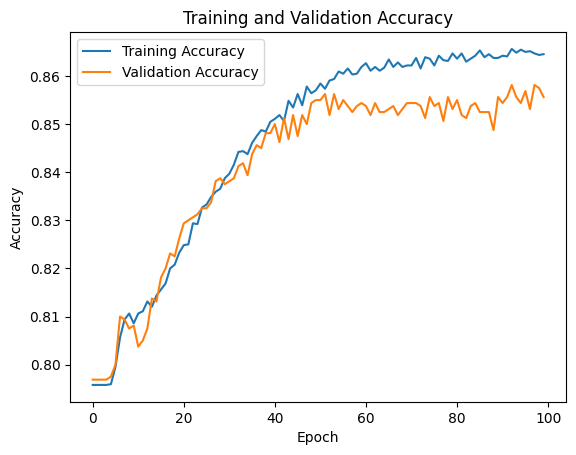

In [56]:


# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'
plt.title('Training and Validation Accuracy')  # Add a title to the plot
plt.legend()  # Display the legend to distinguish lines
plt.show()  # Show the plot
